In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [38]:
def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score

In [39]:
def standardize(x):
    for i in range(x.shape[1]):
        x[:,i] = (x[:,i] - np.mean(x[:,i]))/np.std(x[:,i])
def shape(x):
    return x.shape
dot = np.dot
exp = np.exp
log = np.log

In [40]:
class LogidticRegression:
    def sigmoid(self,z):
        sig = 1/(1+exp(-z))
        return sig
    
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
    
    def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)
        
        def cost(theta):
            z = dot(X,theta)
            cost0 = y.T.dot(log(self.sigmoid(z)))
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z)))
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,)
    
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
    
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

In [41]:
df = pd.read_csv('untitled.csv')
df.head(10)

,x,y
0,0.116,0
1,2.198,0
2,2.068,0
3,1.633,0
4,3.254,1
5,3.823,1
6,3.904,1
7,7.762,1
8,5.891,1
9,6.711,1


In [42]:
x = df['x'].to_numpy().reshape(-1, 1)
y = df['y'].to_numpy()

In [43]:
standardize(x)
obj = LogidticRegression()
model= obj.fit(x, y)
y_pred = obj.predict(x)
#Let's see the f1-score for training and testing data
f1_score = F1_score(y, y_pred)
print(f1_score)

0.980891719745223


(14, 1) (14,) (124, 1) (124,)


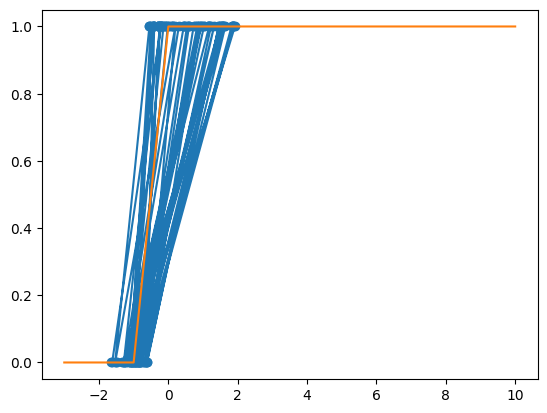

In [44]:
ar = np.array
X = ar(list(range(-3, 11))).reshape(-1, 1)
Y = ar(obj.predict(X))
# print('accuracy:', (obj.predict(x) == y).mean(), (obj.predict(X) == Y).mean())

print(X.shape, Y.shape, x.shape, y.shape)

plt.plot(x, y, '-o')
plt.plot(X, Y)
plt.show()